# Sistema de recomendação para jogadores de futebol
### Projeto IACH - MECD (2022/2023)

In [1]:
import os
import numpy as np
import pandas as pd

### Read Data

In [2]:
pasta = "data"

def readData(fileName):
    dir = os.path.join(pasta, fileName)
    dfs = pd.read_excel(dir)

    dFrame = pd.DataFrame(dfs)
    display(dFrame)

    return [dfs, dFrame]

[data, dataFrame] = readData("FIFA22playersdataset.xlsx")

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


### Data treatment

In [3]:
def dropColumns(data):
    data = data.drop(columns=["sofifa_id", "player_url", "club_team_id", "club_jersey_number", "nationality_id", "nation_team_id", "nation_jersey_number", "real_face", "club_logo_url", "club_flag_url", "nation_logo_url", "nation_flag_url"])
    #display(data)
    return data

def nullValues(data):
    data['club_name'] = data['club_name'].fillna('Free agent')
    data['league_name'] = data['league_name'].fillna('Free agent')
    data['club_loaned_from'] = data['club_loaned_from'].fillna('No loan')
    data = data.fillna(0)
    return data

def repeatedNames(data):
    newID = []
    size = data.shape[0]
    ids = np.arange(size)
    data = data.assign(NewID = ids)
    #display(data)
    return data

dataFrame = dropColumns(dataFrame)
dataFrame = nullValues(dataFrame)
#dataFrame.to_csv('new_data.csv', encoding='utf-8')
dataFrame = repeatedNames(dataFrame)



### Statiscal Analysis

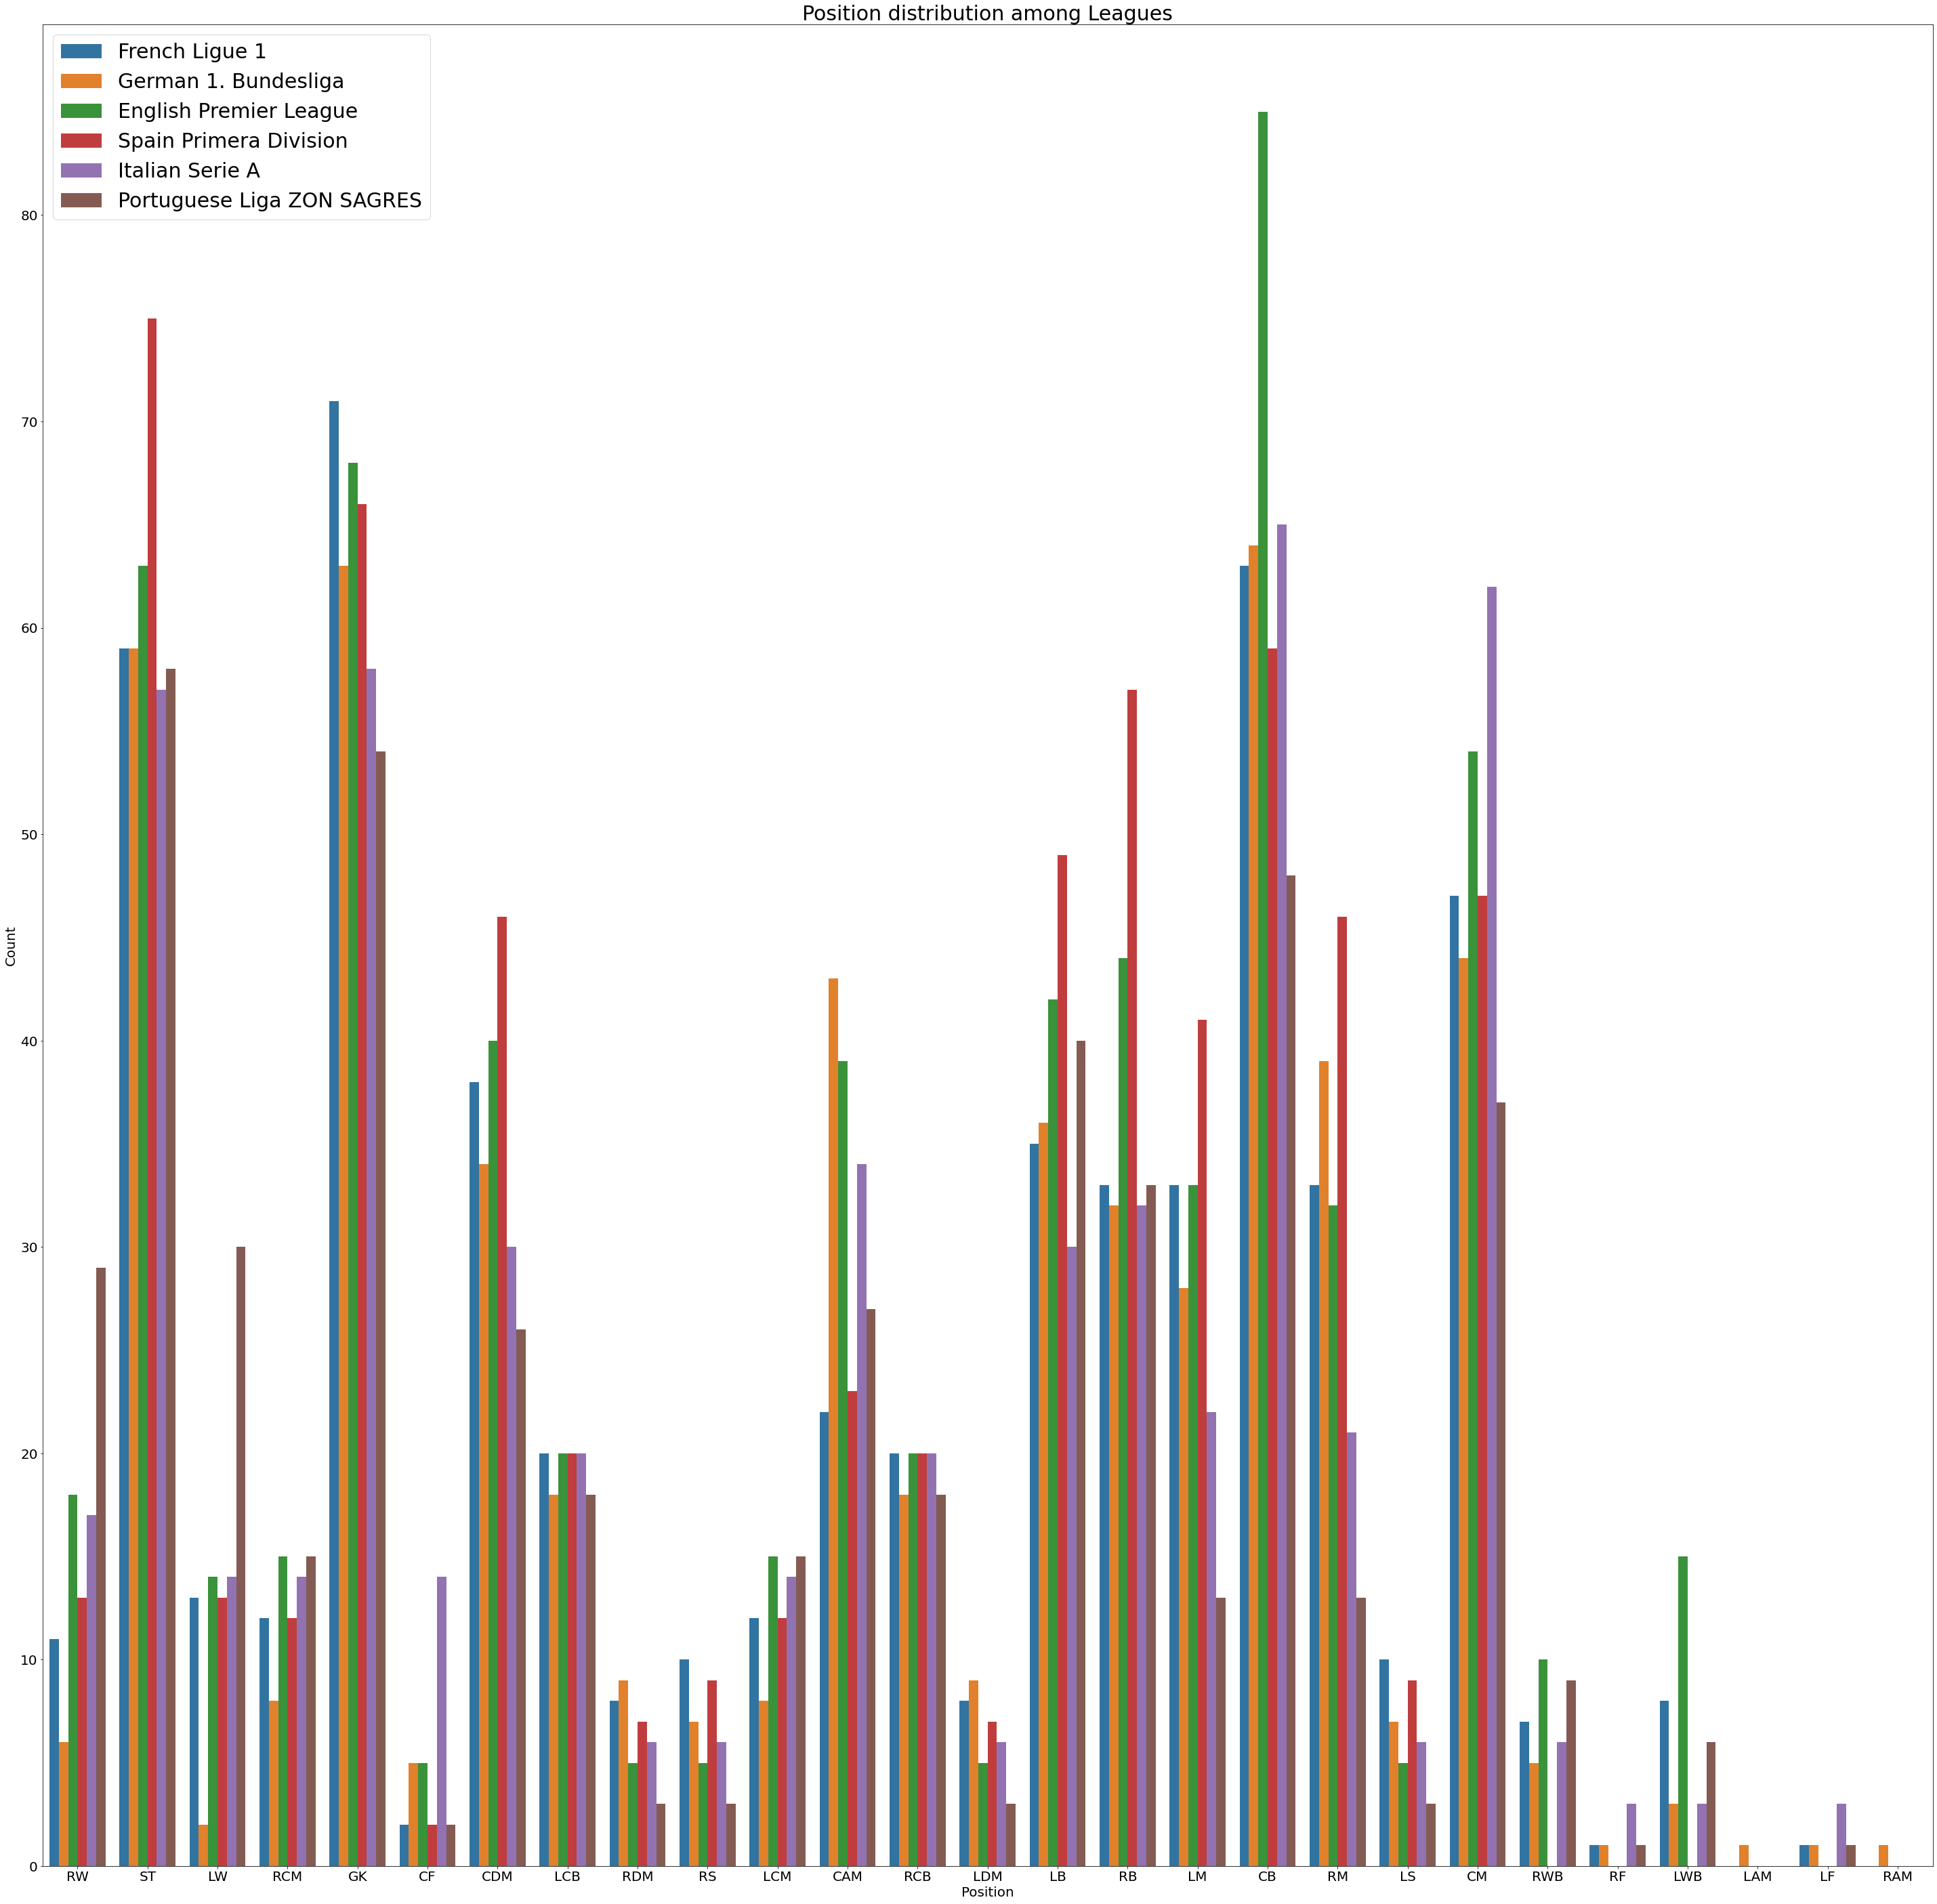

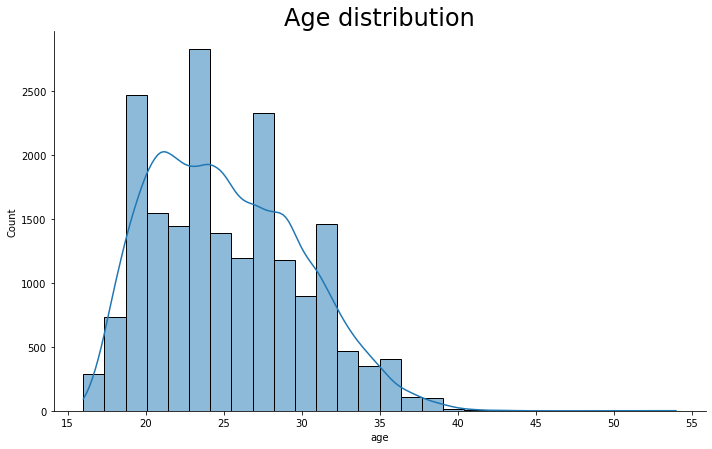

In [54]:
import seaborn as sns 
import matplotlib.pyplot as plt

def leagueDistribution(data):
    fig, _ = plt.subplots(figsize=(50,50))

    aux_data = pd.concat([data['league_name'], data['player_positions'].str.split(', ', expand=True)], axis = 1)

    data_aux = data.copy()
    data_aux.loc[data_aux['club_position'] == 'SUB', 'club_position'] = aux_data[0]
    data_aux.loc[data_aux['club_position'] == 'RES', 'club_position'] = aux_data[0]

    ax = sns.countplot(x='club_position', hue='league_name', data=data_aux)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.legend(fontsize = 30)
    plt.xlabel('Position', fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title('Position distribution among Leagues', fontsize = 30)

def ageDistribution(data):
    sns.FacetGrid(data, height=6, aspect=10/6).map(sns.histplot, "age", bins = 28, kde = True)
    plt.title("Age distribution", size=24)
    
distributionDF = dataFrame[dataFrame['league_name'].isin(["French Ligue 1", "German 1. Bundesliga", "English Premier League", "Spain Primera Division", "Italian Serie A", "Portuguese Liga ZON SAGRES"])]

leagueDistribution(distributionDF)

ageDistribution(dataFrame)

